In [94]:
from skbio import Alignment, DNA
from skbio.stats.distance import DistanceMatrix
import numpy as np
from scipy.cluster.hierarchy import average, dendrogram

In [81]:
aln = Alignment([DNA('ACCGTGAAGCCAATAC', 's1'),
                 DNA('AACGTGCAACCATTAC', 's2'),
                 DNA('AGCGTGCAGCCAATAC', 's3'),
                 DNA('AGGGTGCCGCAAATAC', 's4'),
                 DNA('AGGGTGCCACAAATAC', 's5')])

In [82]:
%psource aln.distances

In [83]:
master_dm = aln.distances()
print(master_dm)

5x5 distance matrix
IDs:
s1, s2, s3, s4, s5
Data:
[[0.     0.25   0.125  0.3125 0.375 ]
 [0.25   0.     0.1875 0.375  0.3125]
 [0.125  0.1875 0.     0.1875 0.25  ]
 [0.3125 0.375  0.1875 0.     0.0625]
 [0.375  0.3125 0.25   0.0625 0.    ]]


In [84]:
master_dm = DistanceMatrix(master_dm.data*16, master_dm.ids)
print(master_dm)

5x5 distance matrix
IDs:
s1, s2, s3, s4, s5
Data:
[[0. 4. 2. 5. 6.]
 [4. 0. 3. 6. 5.]
 [2. 3. 0. 3. 4.]
 [5. 6. 3. 0. 1.]
 [6. 5. 4. 1. 0.]]


In [85]:
iter1_ids = ['s1', 's2', 's3', '(s4, s5)']
iter1_dm = [[0.0,   4.0,  2.0, None],
            [4.0,   0.0,  3.0, None],
            [2.0,   3.0,  0.0, None],
            [None, None, None, None]]

In [86]:
print(np.mean([master_dm[0][3], master_dm[0][4]]))
print(np.mean([master_dm[1][3], master_dm[1][4]]))
print(np.mean([master_dm[2][3], master_dm[2][4]]))

5.5
5.5
3.5


In [87]:
iter1_dm = [[0.0, 4.0, 2.0, 5.5],
      [4.0, 0.0, 3.0, 5.5],
      [2.0, 3.0, 0.0, 3.5],
      [5.5, 5.5, 3.5, 0.0]]

iter1_dm = DistanceMatrix(iter1_dm, iter1_ids)
print(iter1_dm)

4x4 distance matrix
IDs:
s1, s2, s3, (s4, s5)
Data:
[[0.  4.  2.  5.5]
 [4.  0.  3.  5.5]
 [2.  3.  0.  3.5]
 [5.5 5.5 3.5 0. ]]


In [88]:
iter2_ids = ['(s1, s3)', 's2', '(s4, s5)']

iter2_dm = [[None, None, None],
      [None,  0.0, 5.5],
      [None,  5.5, 0.0]]

In [89]:
print(np.mean([master_dm[1][0], master_dm[1][2]]))
print(np.mean([master_dm[0][3], master_dm[0][4], master_dm[2][3], master_dm[2][4]]))

3.5
4.5


In [90]:
iter2_dm = [[0.0, 3.5, 4.5],
            [3.5, 0.0, 5.5],
            [4.5, 5.5, 0.0]]

iter2_dm = DistanceMatrix(iter2_dm, iter2_ids)
print(iter2_dm)

3x3 distance matrix
IDs:
(s1, s3), s2, (s4, s5)
Data:
[[0.  3.5 4.5]
 [3.5 0.  5.5]
 [4.5 5.5 0. ]]


In [91]:
iter3_ids = ['((s1, s3), s2)', '(s4, s5)']

iter3_dm = [[None, None],
            [None,  0.0]]

In [92]:
print(np.mean([master_dm[0][3], master_dm[0][4], master_dm[2][3], master_dm[2][4], master_dm[1][3], master_dm[1][4]]))

4.833333333333333


In [93]:
iter3_dm = [[0.0, 4.8],
            [4.8, 0.0]]

iter3_dm = DistanceMatrix(iter3_dm, iter3_ids)
print(iter3_dm)

2x2 distance matrix
IDs:
((s1, s3), s2), (s4, s5)
Data:
[[0.  4.8]
 [4.8 0. ]]


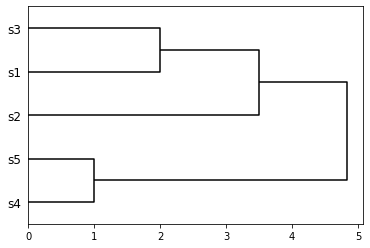

In [97]:
lm = average(master_dm.condensed_form())
d = dendrogram(lm, labels=master_dm.ids, orientation='right',
               link_color_func=lambda x: 'black')